SVM KERNELS INTUITION AND PRACTICAL EXPLANATION 

In [22]:
import numpy as np 
import matplotlib.pyplot as plt

x = np.linspace(-5.0,5.0,100)#: This function from the NumPy library is used to create an array of evenly spaced numbers over a specified interval.
y = np.sqrt(10**2 - x**2)
y = np.hstack([y,-y])
x = np.hstack([x,-x])

In [24]:
y

array([ 8.66025404,  8.71779204,  8.77378994,  8.82827705,  8.88128118,
        8.93282873,  8.98294476,  9.03165312,  9.07897646,  9.12493632,
        9.16955321,  9.21284664,  9.25483518,  9.29553652,  9.3349675 ,
        9.37314414,  9.41008171,  9.44579475,  9.4802971 ,  9.51360192,
        9.54572176,  9.57666854,  9.60645359,  9.63508769,  9.66258107,
        9.68894344,  9.714184  ,  9.73831149,  9.76133416,  9.7832598 ,
        9.80409577,  9.82384901,  9.84252604,  9.86013297,  9.87667553,
        9.89215905,  9.90658851,  9.91996849,  9.93230325,  9.94359667,
        9.9538523 ,  9.96307334,  9.97126266,  9.9784228 ,  9.98455598,
        9.98966408,  9.99374868,  9.99681104,  9.99885209,  9.99987246,
        9.99987246,  9.99885209,  9.99681104,  9.99374868,  9.98966408,
        9.98455598,  9.9784228 ,  9.97126266,  9.96307334,  9.9538523 ,
        9.94359667,  9.93230325,  9.91996849,  9.90658851,  9.89215905,
        9.87667553,  9.86013297,  9.84252604,  9.82384901,  9.80

In [26]:
x1 = np.linspace(-5.0,5.0,100)#: This function from the NumPy library is used to create an array of evenly spaced numbers over a specified interval.
y1 = np.sqrt(5**2 - x1**2)
y1 = np.hstack([y1,-y1])
x1 = np.hstack([x1,-x1])

In [28]:
y1

array([ 0.        ,  0.99994898,  1.40690791,  1.71419826,  1.96904936,
        2.18984681,  2.38606299,  2.563349  ,  2.72540153,  2.87479787,
        3.01342099,  3.14269681,  3.26373625,  3.37742495,  3.48448249,
        3.5855029 ,  3.68098326,  3.77134438,  3.85694608,  3.93809873,
        4.0150721 ,  4.08810229,  4.1573971 ,  4.2231404 ,  4.28549564,
        4.34460872,  4.40061029,  4.45361771,  4.50373673,  4.55106276,
        4.59568209,  4.63767284,  4.67710582,  4.71404521,  4.7485492 ,
        4.78067053,  4.81045693,  4.83795152,  4.86319318,  4.88621682,
        4.90705366,  4.92573145,  4.94227468,  4.95670471,  4.96903995,
        4.97929598,  4.98748561,  4.99361903,  4.99770379,  4.99974492,
        4.99974492,  4.99770379,  4.99361903,  4.98748561,  4.97929598,
        4.96903995,  4.95670471,  4.94227468,  4.92573145,  4.90705366,
        4.88621682,  4.86319318,  4.83795152,  4.81045693,  4.78067053,
        4.7485492 ,  4.71404521,  4.67710582,  4.63767284,  4.59

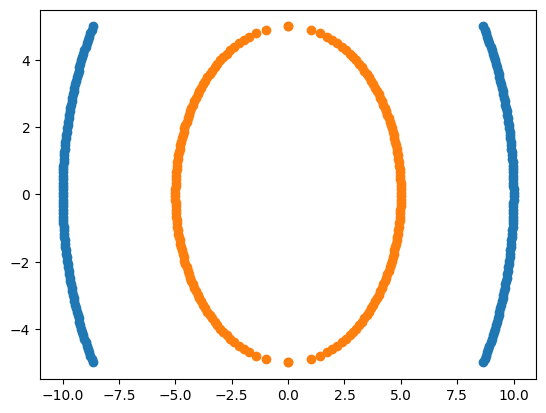

In [30]:
plt.scatter(y,x)
plt.scatter(y1,x1)

In [31]:
import pandas as pd
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
df = pd.concat([df1, df2], ignore_index=True)

In [34]:
df.head()

,X1,X2,Y
0,8.660254,-5.00000,0
1,8.717792,-4.89899,0
2,8.773790,-4.79798,0
3,8.828277,-4.69697,0
4,8.881281,-4.59596,0


In [35]:
df.tail()

,X1,X2,Y
395,-1.969049,-4.59596,1
396,-1.714198,-4.69697,1
397,-1.406908,-4.79798,1
398,-0.999949,-4.89899,1
399,-0.000000,-5.00000,1


In [38]:
X = df.iloc[:,:2]
y= df.Y

In [40]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [44]:
y_train

247    1
110    0
16     0
66     0
153    0
      ..
71     0
106    0
270    1
348    1
102    0
Name: Y, Length: 300, dtype: int64

In [47]:
X_train 

,X1,X2
247,4.993619,-0.252525
110,-9.169553,3.989899
16,9.410082,-3.383838
66,9.860133,1.666667
153,-9.993749,-0.353535
...,...,...
71,9.761334,2.171717
106,-8.982945,4.393939
270,4.551063,2.070707
348,-4.997704,0.151515


In [49]:
# We need to find components for the Polynomical Kernel
#X1,X2,X1_square,X2_square,X1*X2
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1_Square,X2_Square,X1*X2
0,8.660254,-5.00000,0,75.000000,25.000000,-43.301270
1,8.717792,-4.89899,0,75.999898,24.000102,-42.708375
2,8.773790,-4.79798,0,76.979390,23.020610,-42.096467
3,8.828277,-4.69697,0,77.938476,22.061524,-41.466150
4,8.881281,-4.59596,0,78.877155,21.122845,-40.818009


In [51]:
### Independent and Dependent features
X = df[['X1','X2','X1_Square','X2_Square','X1*X2']]
y = df['Y']

In [53]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    1
399    1
Name: Y, Length: 400, dtype: int64

In [55]:

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


In [57]:
X_train

,X1,X2,X1_Square,X2_Square,X1*X2
250,4.999745,0.050505,24.997449,0.002551,0.252512
63,9.906589,1.363636,98.140496,1.859504,13.508984
312,-3.263736,3.787879,10.651974,14.348026,-12.362637
159,-9.953852,-0.959596,99.079176,0.920824,9.551676
283,3.680983,3.383838,13.549638,11.450362,12.455852
...,...,...,...,...,...
323,-4.223140,2.676768,17.834915,7.165085,-11.304366
192,-9.031653,-4.292929,81.570758,18.429242,38.772248
117,-9.445795,3.282828,89.223038,10.776962,-31.008922
47,9.996811,-0.252525,99.936231,0.063769,-2.524447


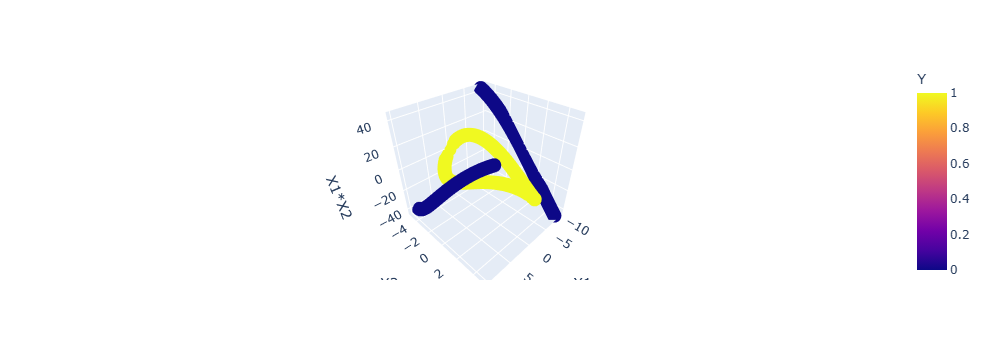

In [61]:
import plotly.express as px

fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
              color='Y')
fig.show()

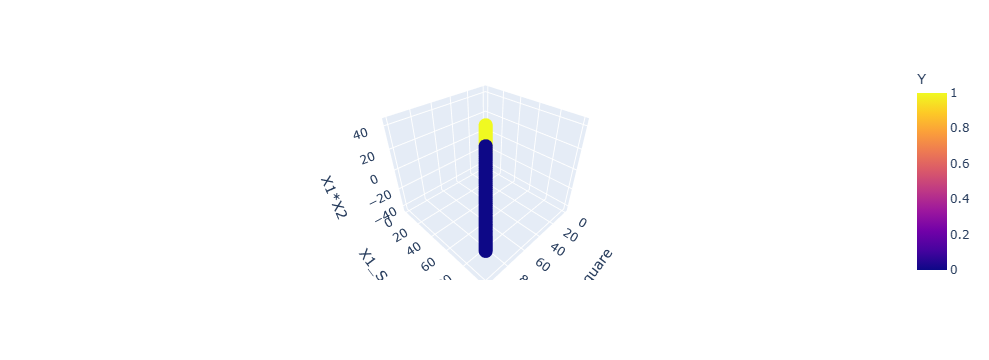

In [63]:

fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
              color='Y')
fig.show()

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)